<a href="https://colab.research.google.com/github/Akramovic1/Face-Recognition/blob/main/face_recognition-PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Download the Dataset 


In [4]:
!wget https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/archive.zip?raw=true

--2022-03-23 04:05:09--  https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/archive.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/RanaAyman/AT-T-Database-of-Faces/raw/main/archive.zip [following]
--2022-03-23 04:05:09--  https://github.com/RanaAyman/AT-T-Database-of-Faces/raw/main/archive.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RanaAyman/AT-T-Database-of-Faces/main/archive.zip [following]
--2022-03-23 04:05:10--  https://raw.githubusercontent.com/RanaAyman/AT-T-Database-of-Faces/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [5]:
!unzip /content/archive.zip?raw=true

Archive:  /content/archive.zip?raw=true
  inflating: README                  
  inflating: s1/1.pgm                
  inflating: s1/10.pgm               
  inflating: s1/2.pgm                
  inflating: s1/3.pgm                
  inflating: s1/4.pgm                
  inflating: s1/5.pgm                
  inflating: s1/6.pgm                
  inflating: s1/7.pgm                
  inflating: s1/8.pgm                
  inflating: s1/9.pgm                
  inflating: s10/1.pgm               
  inflating: s10/10.pgm              
  inflating: s10/2.pgm               
  inflating: s10/3.pgm               
  inflating: s10/4.pgm               
  inflating: s10/5.pgm               
  inflating: s10/6.pgm               
  inflating: s10/7.pgm               
  inflating: s10/8.pgm               
  inflating: s10/9.pgm               
  inflating: s11/1.pgm               
  inflating: s11/10.pgm              
  inflating: s11/2.pgm               
  inflating: s11/3.pgm               
  inflatin

In [6]:
import cv2
arr = cv2.imread('/content/s1/1.pgm', 0) 
print(len(arr[0]))
print(len(arr))
print(arr)

92
112
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]


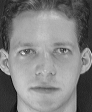

In [7]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/s1/1.pgm', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

##2. Generate the Data Matrix and the Label vector 

In [8]:
import numpy as np
import os
import cv2

data=[]
subject=[]
for i in range(1,41):
	images = os.listdir('/content/s'+str(i))
	for image in images:
		img = cv2.imread('/content/s'+str(i)+"/"+image,0)
		height1, width1 = img.shape[:2]
		img_col = np.array(img, dtype='float64').flatten()
		sub = int(i)
		data.append(img_col)
		subject.append(sub)

In [9]:
print(data)
print(len(data[0]))
print(len(data))

print(subject)
print(len(subject))

[array([64., 76., 80., ..., 35., 37., 39.]), array([60., 60., 62., ..., 32., 34., 34.]), array([63., 53., 35., ..., 41., 10., 24.]), array([48., 49., 45., ..., 47., 46., 46.]), array([41., 47., 47., ..., 35., 37., 38.]), array([44., 43., 32., ..., 43., 43., 37.]), array([42., 41., 44., ..., 42., 43., 41.]), array([ 43.,  50.,  41., ..., 158., 153., 169.]), array([39., 44., 53., ..., 29., 26., 29.]), array([34., 34., 33., ..., 37., 40., 33.]), array([35., 32., 36., ..., 25., 28., 29.]), array([37., 35., 35., ..., 26., 28., 28.]), array([34., 36., 35., ..., 32., 25., 25.]), array([ 35.,  36.,  37., ..., 144., 147., 143.]), array([ 38.,  35.,  36., ..., 138., 142., 141.]), array([ 34.,  39.,  35., ..., 135., 138., 148.]), array([ 43.,  39.,  36., ..., 154., 155., 141.]), array([34., 35., 35., ..., 31., 24., 24.]), array([30., 37., 35., ..., 26., 27., 32.]), array([ 37.,  34.,  38., ..., 135., 143., 133.]), array([101., 104., 104., ...,  42.,  46.,  43.]), array([100.,  99., 108., ...,  44

In [10]:
import pandas as pd
df = pd.DataFrame(data=data)
# print(df)
df.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0   64.0   76.0   80.0   53.0   34.0   72.0   60.0   66.0   66.0   50.0  ...   
1   60.0   60.0   62.0   53.0   48.0   51.0   61.0   60.0   71.0   68.0  ...   
2   63.0   53.0   35.0   36.0   33.0   34.0   31.0   35.0   39.0   43.0  ...   
3   48.0   49.0   45.0   47.0   49.0   57.0   39.0   42.0   53.0   49.0  ...   
4   41.0   47.0   47.0   46.0   44.0   49.0   48.0   58.0   61.0   49.0  ...   

   10294  10295  10296  10297  10298  10299  10300  10301  10302  10303  
0   31.0   28.0   34.0   32.0   35.0   34.0   35.0   35.0   37.0   39.0  
1   27.0   35.0   28.0   33.0   31.0   31.0   37.0   32.0   34.0   34.0  
2  173.0  169.0  166.0  161.0  158.0  169.0  137.0   41.0   10.0   24.0  
3   39.0   44.0   40.0   41.0   49.0   42.0   44.0   47.0   46.0   46.0  
4   27.0   34.0   35.0   34.0   36.0   34.0   39.0   35.0   37.0   38.0  

[5 rows x 10304 columns]

In [11]:
df["label"] = subject
print(df)

         0      1      2      3      4      5      6      7      8      9  \
0     64.0   76.0   80.0   53.0   34.0   72.0   60.0   66.0   66.0   50.0   
1     60.0   60.0   62.0   53.0   48.0   51.0   61.0   60.0   71.0   68.0   
2     63.0   53.0   35.0   36.0   33.0   34.0   31.0   35.0   39.0   43.0   
3     48.0   49.0   45.0   47.0   49.0   57.0   39.0   42.0   53.0   49.0   
4     41.0   47.0   47.0   46.0   44.0   49.0   48.0   58.0   61.0   49.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  125.0  119.0  124.0  125.0  124.0  121.0  123.0  125.0  123.0  123.0   
396  119.0  120.0  120.0  118.0  120.0  121.0  121.0  116.0  120.0  121.0   
397  123.0  121.0  126.0  122.0  127.0  127.0  123.0  124.0  123.0  127.0   
398  131.0  125.0  126.0  131.0  125.0  129.0  125.0  127.0  127.0  127.0   
399  125.0  124.0  124.0  126.0  123.0  125.0  127.0  123.0  124.0  124.0   

     ...  10295  10296  10297  10298  10299  10300  10301  10302  10303  la

##3. Split the Dataset into Training and Test sets (10 Points)
a. From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. This will give you 5 instances per person for training and 5 instances per person for testing.

b. Split the labels vector accordingly.

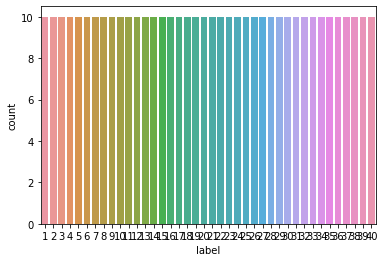

In [12]:
import seaborn as sns
sns.countplot(x='label', data=df)
sns.set(rc={'figure.figsize':(15,10)})

In [13]:
testData = df[df.index % 2 == 0]  #even rows
trainData = df[df.index % 2 != 0]   #odd rows

In [14]:
# testData.head()
trainData.head()

0     1     2     3     4     5     6     7     8     9  ...  10295  \
1  60.0  60.0  62.0  53.0  48.0  51.0  61.0  60.0  71.0  68.0  ...   35.0   
3  48.0  49.0  45.0  47.0  49.0  57.0  39.0  42.0  53.0  49.0  ...   44.0   
5  44.0  43.0  32.0  32.0  30.0  30.0  38.0  40.0  48.0  66.0  ...   42.0   
7  43.0  50.0  41.0  58.0  78.0  83.0  67.0  48.0  44.0  46.0  ...  164.0   
9  34.0  34.0  33.0  32.0  38.0  40.0  39.0  49.0  54.0  57.0  ...   44.0   

   10296  10297  10298  10299  10300  10301  10302  10303  label  
1   28.0   33.0   31.0   31.0   37.0   32.0   34.0   34.0      1  
3   40.0   41.0   49.0   42.0   44.0   47.0   46.0   46.0      1  
5   42.0   40.0   33.0   29.0   37.0   43.0   43.0   37.0      1  
7  164.0  162.0  159.0  156.0  155.0  158.0  153.0  169.0      1  
9   38.0   30.0   37.0   30.0   36.0   37.0   40.0   33.0      1  

[5 rows x 10305 columns]

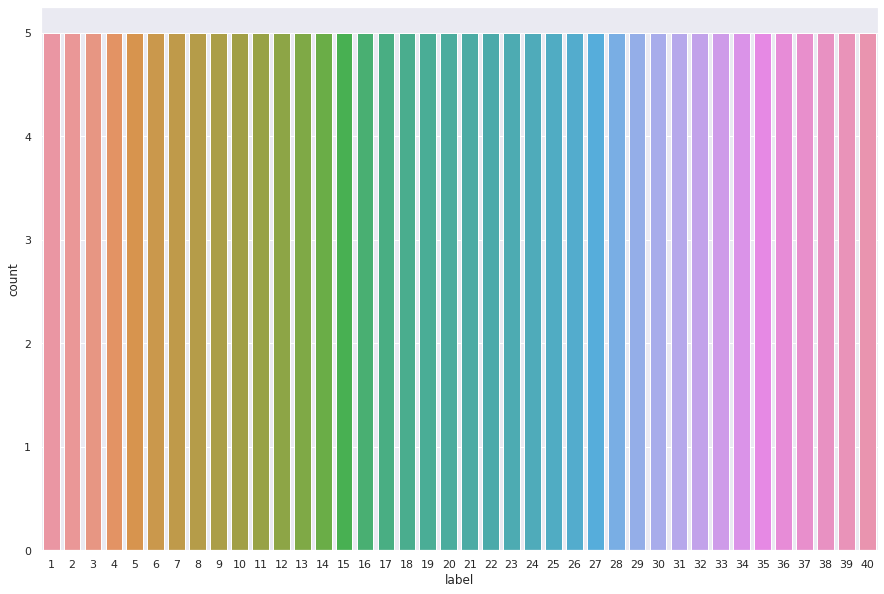

In [15]:
sns.countplot(x='label', data=testData)
sns.set(rc={'figure.figsize':(15,10)})

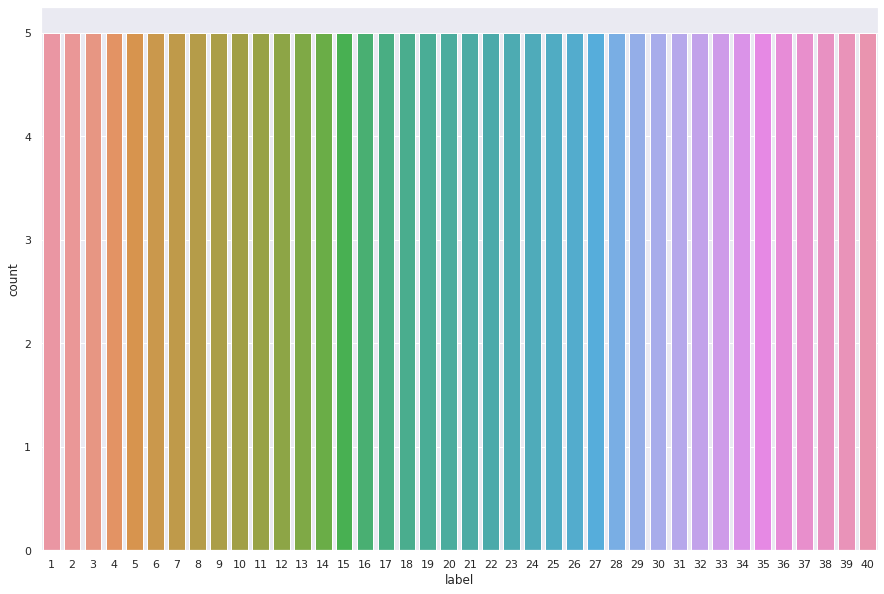

In [16]:
sns.countplot(x='label', data=trainData)
sns.set(rc={'figure.figsize':(15,10)})

--------------------------------------------------------------------------------


In [17]:
import matplotlib.pyplot as plt
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(20, 20),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(112, 92), cmap='gray')
	plt.show()

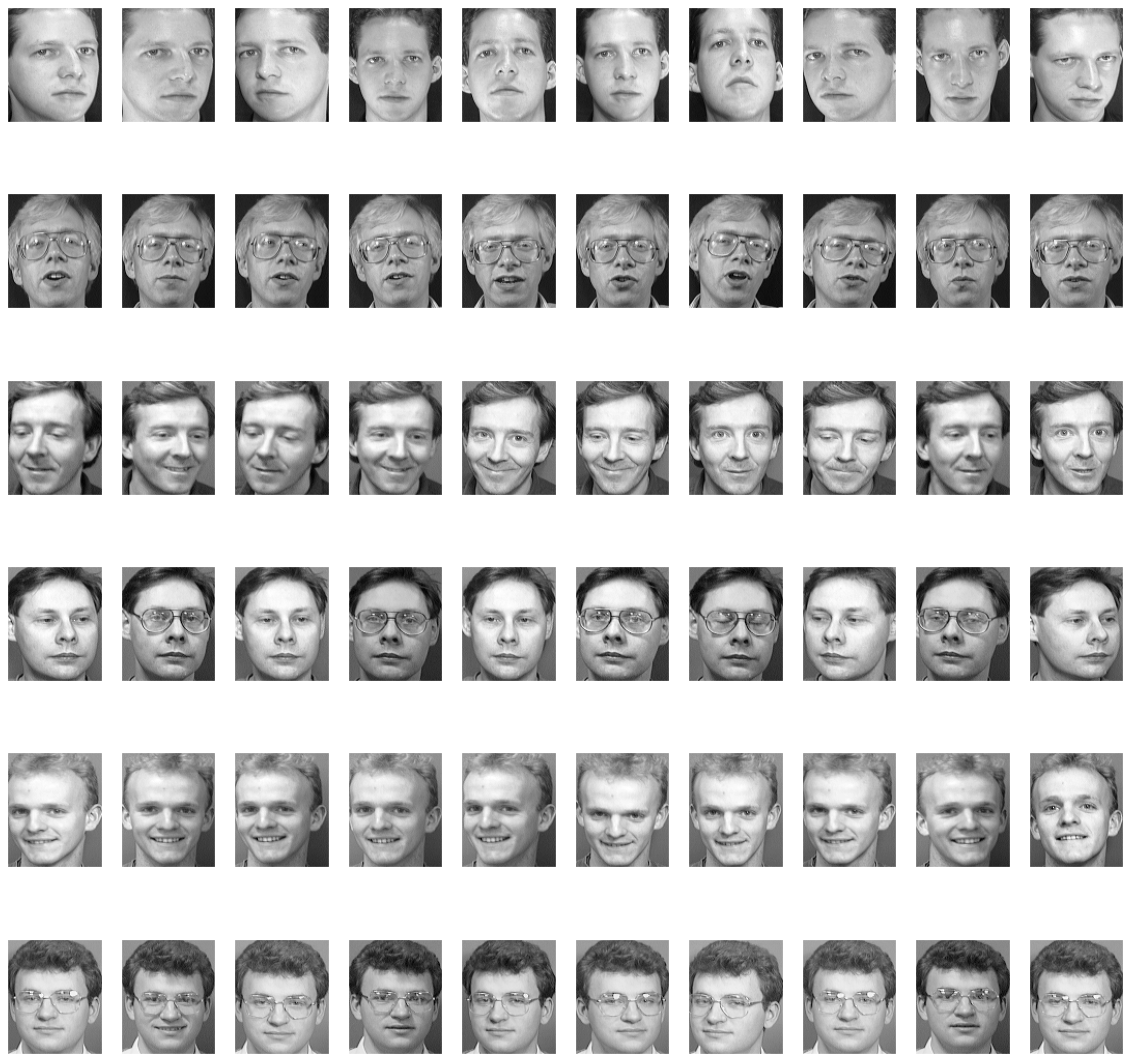

In [18]:
pixels =  df.drop(["label"],axis=1)
show_orignal_images(pixels)

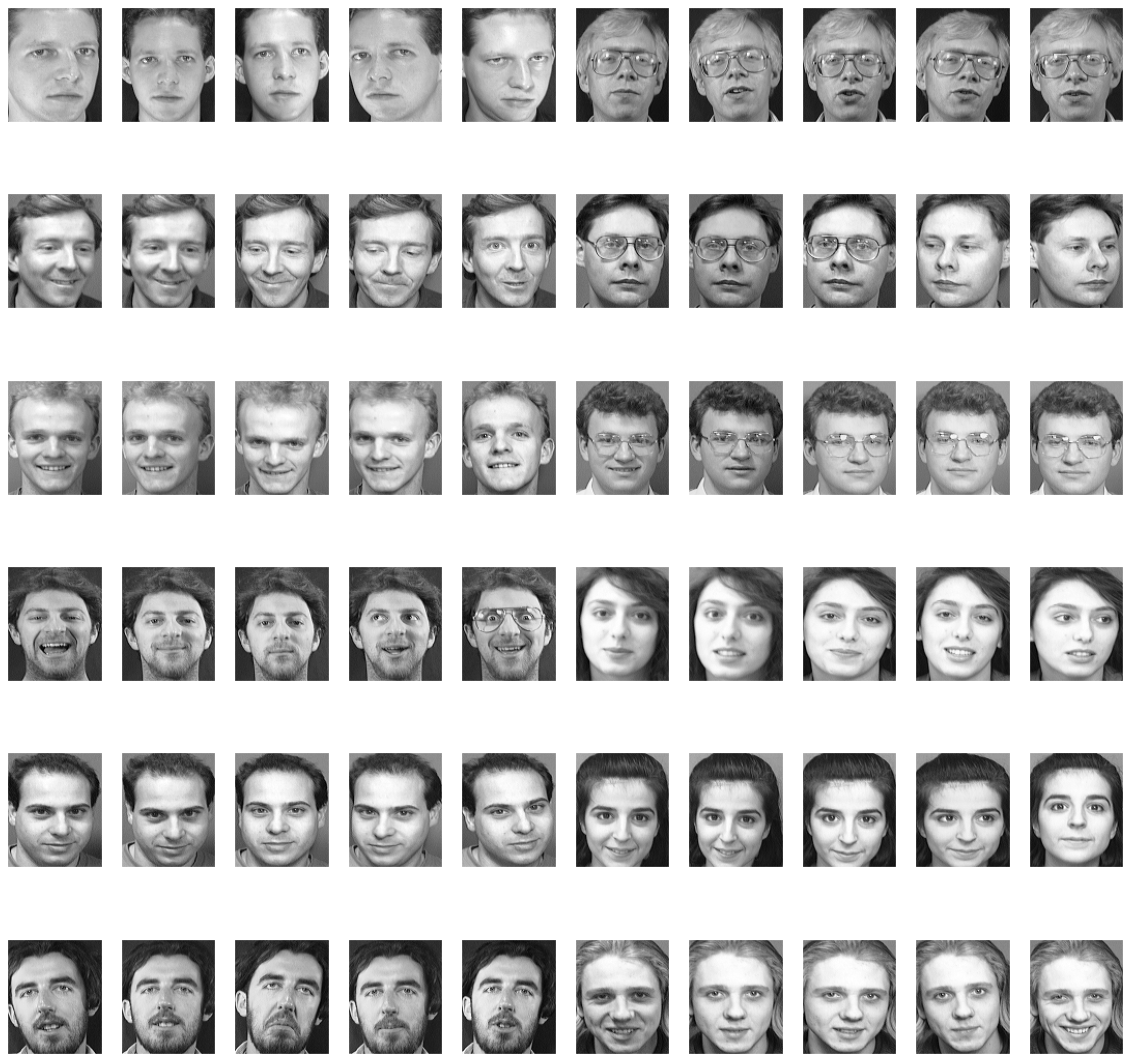

In [19]:
pixels =  trainData.drop(["label"],axis=1)
show_orignal_images(pixels)

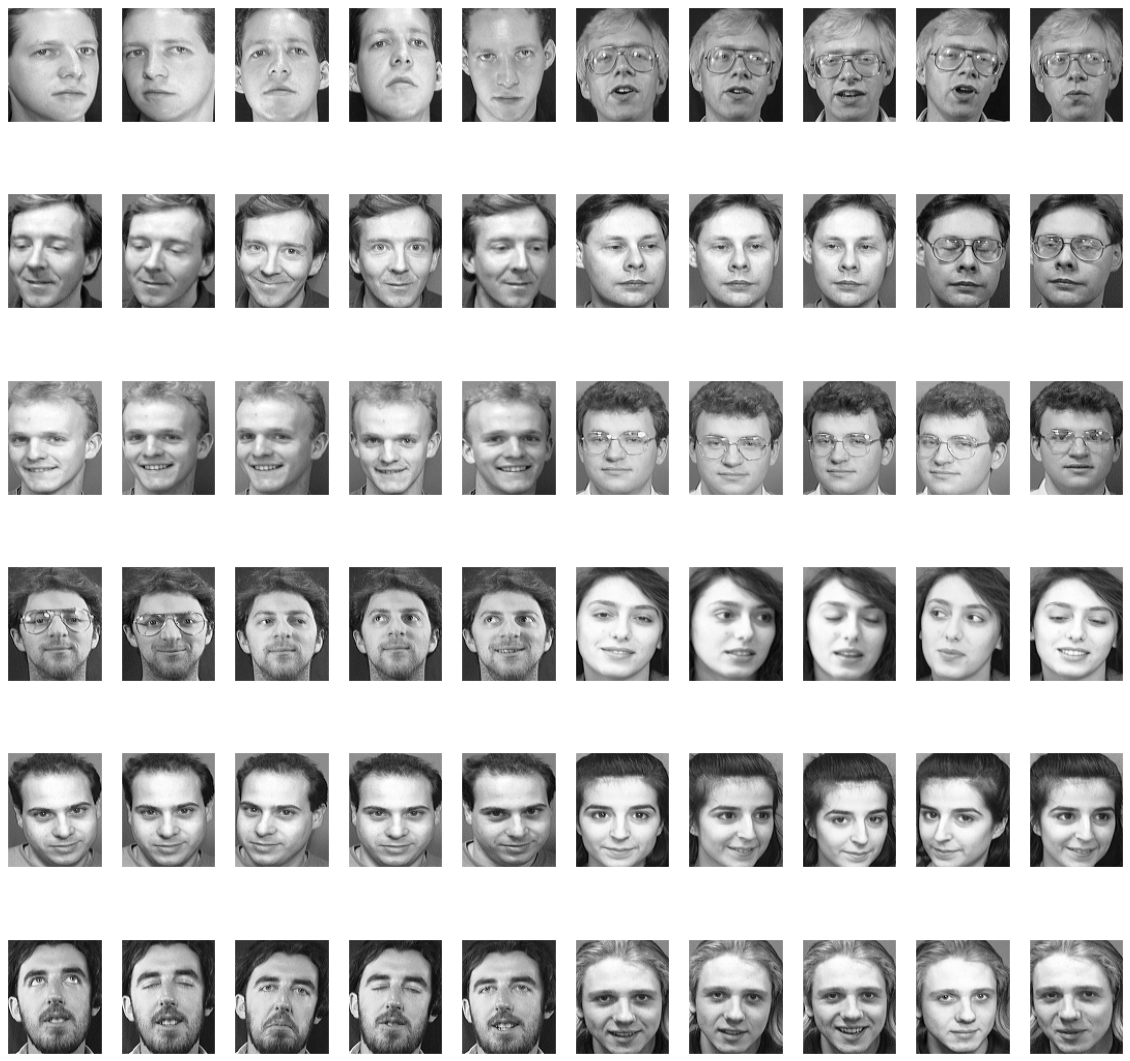

In [20]:
pixels =  testData.drop(["label"],axis=1)
show_orignal_images(pixels)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

##4. Classification using PCA 

In [21]:
from numpy.lib.function_base import append
def pca(Dtrain , alpha):
     
    #center the data
    D_meaned = Dtrain - np.mean(Dtrain , axis = 0)

    #compute covariance matrix
    cov_mat = np.cov(D_meaned , rowvar = False)
     
    #compute eigenvalues & eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #choose dimensionality
    count=0
    var_exp=[]
    sumEigenvalues = sum(sorted_eigenvalue)
    for i in sorted_eigenvalue :
      if count<alpha :
        v = i / sumEigenvalues
        var_exp.append(v)
        count+=v
      else:
        break
    num_components = len(var_exp)
    print("num_components = ",num_components)

    #reduced basis
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #reduced dimensionality data
    D_reduced_train = np.dot(D_meaned, eigenvector_subset)
     
    return D_reduced_train,eigenvector_subset

In [21]:
trainFaces=trainData.drop(["label"],axis=1)
testFaces=testData.drop(["label"],axis=1)
reducedTrainData,EVectors=pca(trainFaces,0.8)
trainTestLabels = trainData['label']


num_components =  37


In [22]:
print(reducedTrainData)

[[ 2988.66609313   553.17610513   191.1791334  ...    57.37405478
    316.0031244    387.37487902]
 [ 1626.03244711   810.68183626 -1997.24087168 ...  -157.6912593
      5.33732947   -70.23622752]
 [ 2839.27219968    30.94674808  -805.88517651 ...   155.9468929
   -262.95905325  -218.54160386]
 ...
 [ 1036.21027445   959.30942949  1657.96018368 ...  -169.19149935
    -26.01887009   286.62910824]
 [  842.75681446  1058.45566944  1651.48158972 ...   -22.12886759
     36.28076967    16.14578572]
 [  642.97534602   536.69739222  1934.14243326 ...    52.34258148
   -116.67950189    51.15047661]]


In [23]:
from sklearn.decomposition import PCA
pcaBuiltIn = PCA(n_components=36)
X = pcaBuiltIn.fit_transform(trainFaces)
print(X)

[[-2988.6660904    553.1761053   -191.17900458 ...   341.6384855
    -36.66816308   188.52830239]
 [-1626.03244648   810.68183009  1997.24096939 ...  -427.0321107
    201.52202581   148.18464576]
 [-2839.27219942    30.94674962   805.88524345 ...    86.85294911
   -125.32305882  -324.88746129]
 ...
 [-1036.21027547   959.30943279 -1657.96019129 ...    30.56321468
    113.80923377   -83.45594997]
 [ -842.75681482  1058.45567251 -1651.48164883 ...    70.1939109
    -27.60912664   -10.65436102]
 [ -642.97534766   536.69739212 -1934.14246605 ...  -121.30745637
    -23.65377072   -96.83434796]]


In [24]:
def show_eigenfaces(data):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(7,5, figsize=(10, 10),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(data[i].reshape(112, 92), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

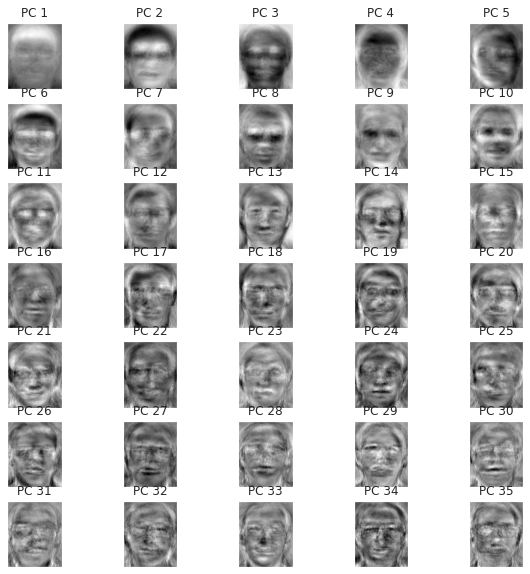

In [25]:
show_eigenfaces(EVectors.transpose())

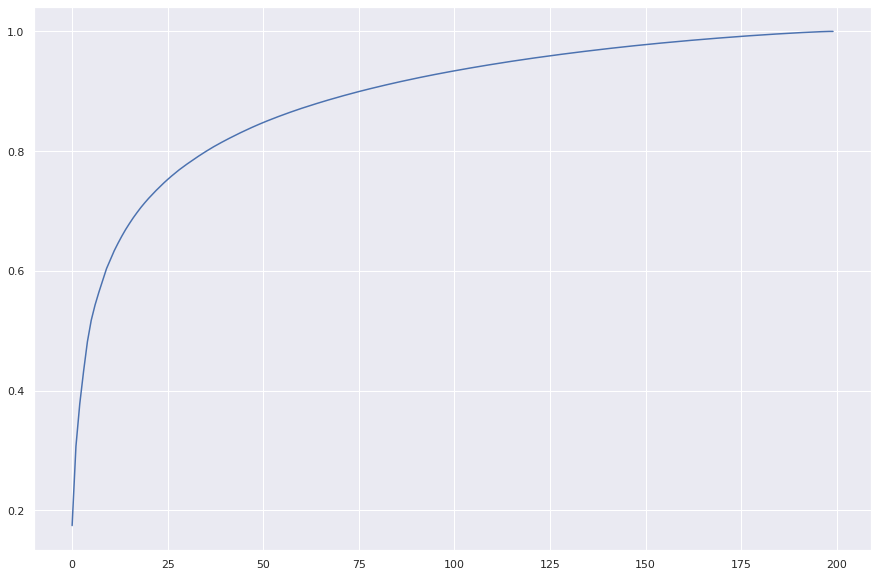

[[-2.98866609e+03  5.53176105e+02 -1.91179133e+02 ...  3.37242274e+00
  -3.70495316e+00 -2.79776202e-13]
 [-1.62603245e+03  8.10681836e+02  1.99724087e+03 ...  2.75032599e+00
   7.53154865e+00  7.90478794e-14]
 [-2.83927220e+03  3.09467481e+01  8.05885177e+02 ... -3.80054271e+00
  -1.45395600e+01 -1.94511074e-13]
 ...
 [-1.03621027e+03  9.59309429e+02 -1.65796018e+03 ... -2.74820454e+01
   2.41613525e+01  8.16346990e-13]
 [-8.42756814e+02  1.05845567e+03 -1.65148159e+03 ... -1.31705981e+00
  -6.96473465e+00  6.38156195e-13]
 [-6.42975346e+02  5.36697392e+02 -1.93414243e+03 ... -2.44649349e+01
  -1.00246117e+01  5.50670620e-13]]


In [26]:
from sklearn.decomposition import PCA
newPCA = PCA(n_components = 200).fit(trainFaces)
plt.plot(np.cumsum(newPCA.explained_variance_ratio_))
plt.show()
print(newPCA.transform(trainFaces))

In [27]:
from sklearn.neighbors import KNeighborsClassifier

def simpleClassifier(reducedTrainData,TestData,trainTestLabels):
  neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
  neigh.fit(reducedTrainData, trainTestLabels)
  score = neigh.score(TestData, trainTestLabels)
  y_pred=neigh.predict(TestData)
  print(classification_report(trainTestLabels, y_pred))
  return score

num_components =  37
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       0.57      0.80      0.67         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.71      1.00      0.83         5
          15       0.83      1.00      0.91         5
          16       1.00      0.60      0.75         5
          17       1.00      0.60      0.75         5
      

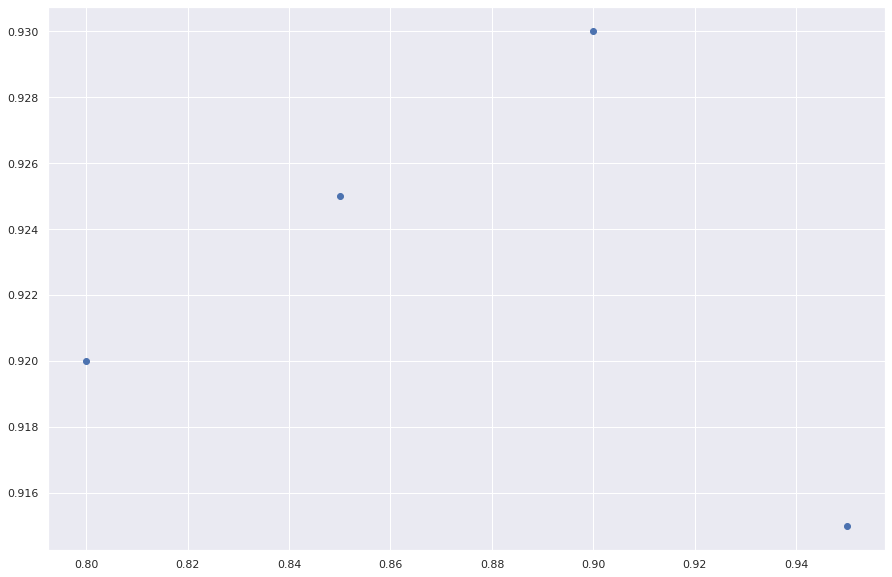

In [30]:
from sklearn.metrics import classification_report

alphas=[0.8,0.85,0.9,0.95]
accuracies = [0,0,0,0]
counter = 0
test_data = testFaces
for alpha in alphas:
  train_data, eigen_vector= pca(trainFaces,alphas[counter])
  D_meaned_test = testFaces - np.mean(testFaces , axis = 0)
  test_data = np.dot(D_meaned_test, eigen_vector)
  accuracies[counter] = simpleClassifier(train_data,test_data,trainTestLabels)
  counter+=1

plt.scatter(alphas, accuracies)
plt.show()

num_components =  37
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       0.57      0.80      0.67         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.71      1.00      0.83         5
          15       0.83      1.00      0.91         5
          16       1.00      0.60      0.75         5
          17       1.00      0.60      0.75         5
      

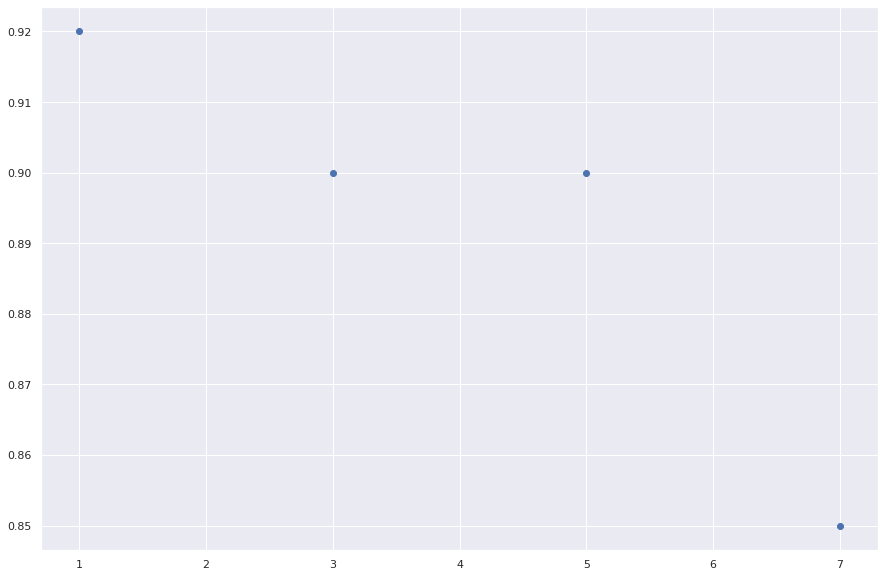

num_components =  52
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.83      1.00      0.91         5
           3       0.57      0.80      0.67         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      0.60      0.75         5
          17       1.00      0.60      0.75         5
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


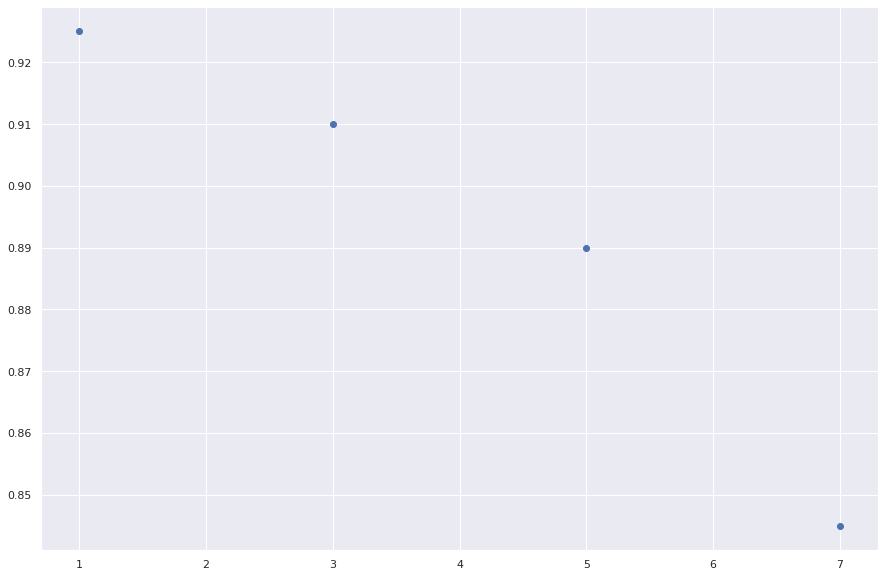

num_components =  77
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.83      1.00      0.91         5
           3       0.67      0.80      0.73         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      0.60      0.75         5
          17       1.00      0.80      0.89         5
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


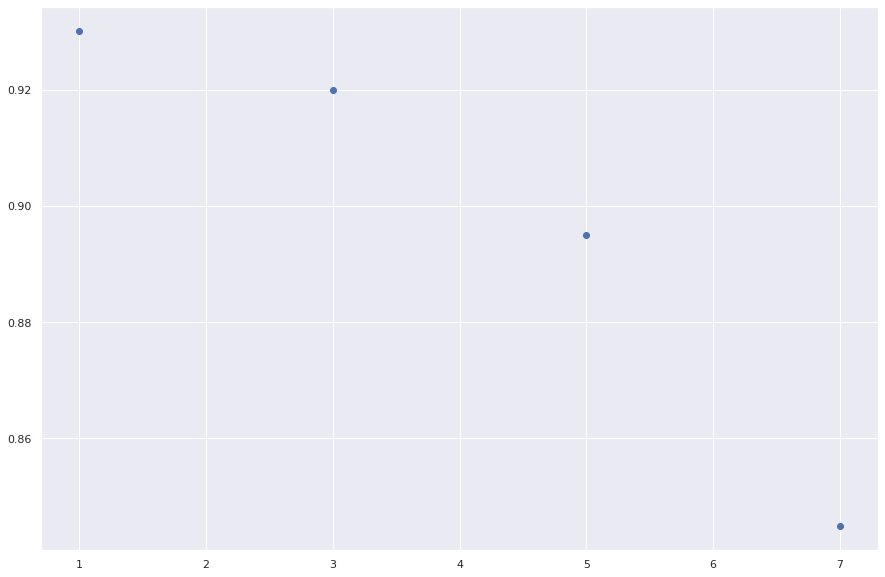

num_components =  116
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.83      1.00      0.91         5
           3       0.67      0.80      0.73         5
           4       1.00      1.00      1.00         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      0.60      0.75         5
          17       0.75      0.60      0.67         5
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


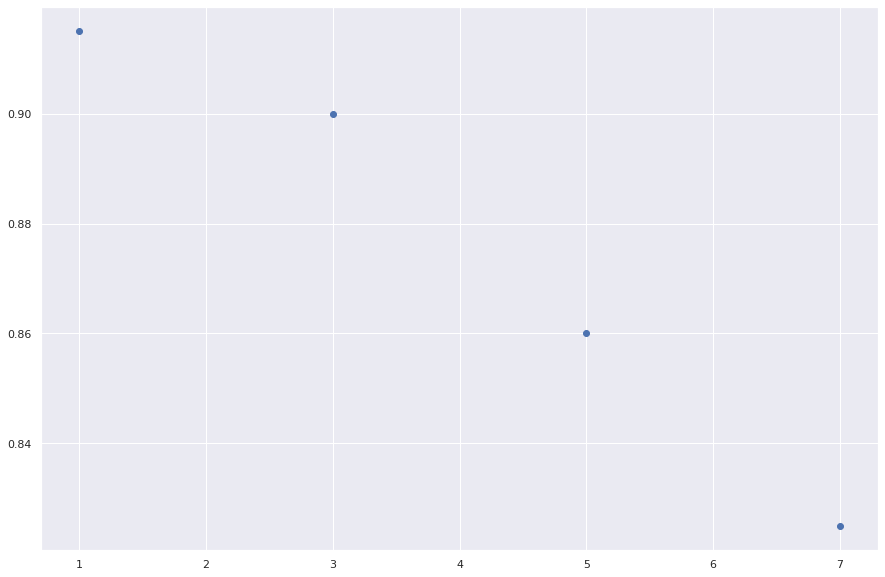

In [32]:
from sklearn.metrics import classification_report

alphas=[0.8,0.85,0.9,0.95]
for alpha in alphas:
  Knn= [1,3,5,7]
  accuracies = [0,0,0,0] 
  train_data, eigen_vector= pca(trainFaces,alpha)
  D_meaned_test = testFaces - np.mean(testFaces , axis = 0)
  test_data = np.dot(D_meaned_test, eigen_vector)
  counter = 0
  for K in Knn:
    neigh = KNeighborsClassifier(n_neighbors=K, weights='distance')
    neigh.fit(train_data, trainTestLabels)
    score = neigh.score(test_data, trainTestLabels)
    y_pred=neigh.predict(test_data)
    print(classification_report(trainTestLabels, y_pred))
    accuracies[counter] = score
    counter += 1
  print(f"Alpha : {alpha}")
  plt.scatter(Knn, accuracies)
  plt.show()

# 5. Classification Using LDA 

In [27]:
def mean_matrix(train_Data,classesNumber):

    means = np.zeros((classesNumber,10305))

    for i in range (1,classesNumber+1) :
      temp = np.zeros((1,10305))
      D = trainData[trainData.label == i] 
      for j in D.index :
        temp = np.add(temp,trainData[trainData.index == j])
     
      temp = temp / len(D) ;
      means[i-1] = temp ; 
    return means

meanMatrix = mean_matrix(trainData,40);

print(meanMatrix)
print(meanMatrix.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


[[ 45.8  47.2  42.6 ...  63.2  63.8   1. ]
 [ 35.4  35.8  36.  ...  96.   95.2   2. ]
 [104.8 104.6 106.6 ...  49.   51.2   3. ]
 ...
 [109.6 108.8 109.6 ...  68.   65.8  38. ]
 [ 86.4  85.8  86.4 ... 124.8 120.2  39. ]
 [123.8 123.2 125.  ...  46.6  48.2  40. ]]
(40, 10305)


In [28]:
totalMean = np.mean(trainData, axis=0)
totalMean = totalMean[:-1]

print(totalMean)
print(totalMean.shape)

0        85.605
1        85.555
2        85.855
3        85.895
4        86.060
          ...  
10299    77.170
10300    78.210
10301    78.625
10302    75.240
10303    74.510
Length: 10304, dtype: float64
(10304,)


In [29]:
def between_class_scatter_matrix(trainData,meanMatrix,totalMean,classesNumber):
  Sb = np.zeros((10304,10304))
  for m in range (0,classesNumber) :
    temp = meanMatrix[m] - totalMean

    #1*10304
    temp = np.array([temp])
    
    D = trainData[trainData.label == m+1] 
    nk = len(D)

    Sb += nk * np.dot(np.transpose(temp),temp)

  return Sb

Sb = between_class_scatter_matrix(trainData,meanMatrix[:,:-1] ,totalMean,40)
print(Sb)
print(Sb.shape)

[[231775.395 229046.845 229439.345 ... -46575.825 -26923.64  -18986.11 ]
 [229046.845 226709.795 226810.295 ... -46932.575 -27836.04  -20329.41 ]
 [229439.345 226810.295 227454.795 ... -47256.275 -28059.44  -20388.81 ]
 ...
 [-46575.825 -46932.575 -47256.275 ... 364362.875 312929.6   302781.45 ]
 [-26923.64  -27836.04  -28059.44  ... 312929.6   288904.48  280381.72 ]
 [-18986.11  -20329.41  -20388.81  ... 302781.45  280381.72  277455.98 ]]
(10304, 10304)


In [30]:
def center_class_matrices(trainData,meanMatrix,classesNumber) :
  Z = np.zeros(trainData.shape)
  index = 0 ;
  for i in range (1,classesNumber+1) :

    D = trainData[trainData.label == i] 
    for j in D.index :
      temp = trainData[trainData.index == j] - meanMatrix[i-1]
      Z[index] = np.array(temp)[0]
      index += 1

    
  return Z[:,:-1] 

Z = center_class_matrices(trainData,meanMatrix,40)
print(Z)
print (Z.shape)


[[ 14.2  12.8  19.4 ... -31.4 -29.2 -29.8]
 [  2.2   1.8   2.4 ... -16.4 -17.2 -17.8]
 [ -1.8  -4.2 -10.6 ... -20.4 -20.2 -26.8]
 ...
 [  1.2  -4.2  -1.  ... -12.4  -7.6  -8.2]
 [ -0.8  -2.2   1.  ...  -8.4 -11.6  -6.2]
 [  1.2   0.8  -1.  ... -12.4 -11.6 -14.2]]
(200, 10304)


In [31]:
def class_scatter_matrix_one(trainData,Z,classesNumber):
  S = np.zeros((10304, 10304))
  for i in range (0,classesNumber) :

    D = trainData[trainData.label == i+1] 
    nk = len(D)

    index = i*nk
    temp = Z[index:index+nk,:]
    S += np.dot(np.transpose(temp),temp)
  return S

S = class_scatter_matrix_one(trainData,Z,40)
print(S)
print(S.shape)

[[ 2.83164e+04  2.71980e+04  2.72762e+04 ... -6.12800e+02  1.48060e+03
   4.03540e+03]
 [ 2.71980e+04  2.84576e+04  2.71208e+04 ...  6.91200e+02  2.79940e+03
   5.58980e+03]
 [ 2.72762e+04  2.71208e+04  2.79020e+04 ... -1.08600e+02  3.41340e+03
   6.68260e+03]
 ...
 [-6.12800e+02  6.91200e+02 -1.08600e+02 ...  1.34802e+05  8.01634e+04
   6.86018e+04]
 [ 1.48060e+03  2.79940e+03  3.41340e+03 ...  8.01634e+04  9.55840e+04
   8.20848e+04]
 [ 4.03540e+03  5.58980e+03  6.68260e+03 ...  6.86018e+04  8.20848e+04
   1.05894e+05]]
(10304, 10304)


In [33]:
from scipy.sparse.linalg import eigs
W = np.dot(np.linalg.inv(S),Sb)
eigen_values , eigen_vectors = np.linalg.eigh(W)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print(sorted_eigenvectors)
print(sorted_eigenvectors.shape)


[[-0.00497383 -0.01377769  0.00076192 ... -0.00016221  0.01359703
  -0.0049737 ]
 [-0.00483886 -0.0140369   0.00041498 ... -0.00052785  0.01390096
  -0.00484638]
 [-0.00490717 -0.0138867   0.00060637 ... -0.00032199  0.01386361
  -0.00492571]
 ...
 [ 0.00649625  0.01760244  0.00960936 ... -0.00981281  0.01727933
  -0.00647557]
 [-0.00842104  0.01229241  0.00391633 ... -0.00436157  0.01195977
   0.00853339]
 [ 0.00423395 -0.00484982  0.00419936 ... -0.00359102 -0.00496311
  -0.00424101]]
(10304, 10304)


b. Project the training set, and test sets separately using the same

In [34]:
U = sorted_eigenvectors[:,0:39]
print(U.shape)

(10304, 39)


In [35]:
def get_reduced_data(trainData,testData,U):

  D_reduced_train = np.dot(trainData,U)
  D_reduced_test = np.dot(testData,U)
     
  return D_reduced_train,D_reduced_test


U = sorted_eigenvectors[:,0:39]
trainFaces=trainData.drop(["label"],axis=1)
testFaces=testData.drop(["label"],axis=1)

D_reduced_train , D_reduced_test = get_reduced_data(trainFaces,testFaces,U)

print(D_reduced_train)
print(D_reduced_train.shape)
print(D_reduced_test)
print(D_reduced_test.shape)

[[ 5.88795556e+03 -4.80135465e+03  1.59415055e+03 ... -6.75211831e+01
  -4.33611946e+02 -4.93767247e+02]
 [ 5.18782742e+03 -4.04855678e+03  2.06591683e+03 ...  5.05263482e+02
   1.52365012e+02 -3.85962655e+02]
 [ 5.84908104e+03 -4.00253647e+03  1.18406379e+03 ...  3.89132061e+02
   1.87661760e+02 -8.14797831e+02]
 ...
 [ 4.63025389e+03 -5.15790508e+03  8.01603379e+02 ...  4.53593292e+02
   1.07925325e+02 -2.48580268e+02]
 [ 4.47933075e+03 -5.11688532e+03  9.86156805e+02 ...  4.12981602e+02
   1.11953482e+02 -1.84349135e+02]
 [ 4.37868054e+03 -4.92763142e+03  1.23560067e+03 ...  1.58294982e+02
   2.78136058e+00 -2.18823901e+02]]
(200, 39)
[[ 6163.70822019 -4666.57633899  1129.44235015 ...    61.24760484
   -163.33759402  -809.40953136]
 [ 5904.79386225 -4782.33901243   917.37552162 ...   251.52683874
     11.80870341  -855.66974319]
 [ 5468.99075683 -4019.30920668  1293.9319053  ...   393.90205715
     71.35311466  -482.60406412]
 ...
 [ 4729.12405733 -5027.81300087  1427.43497126 ...  

c. Use a simple classifier (first Nearest Neighbor to determine the class
labels).

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def simpleClassifier(reducedTrainData,reducedTestData,trainTestLabels):
  neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
  neigh.fit(reducedTrainData, trainTestLabels)
  score = neigh.score(reducedTestData, trainTestLabels)
  y_pred=neigh.predict(reducedTestData)
  print(classification_report(trainTestLabels, y_pred))
  return score


simpleClassifier(D_reduced_train,D_reduced_test,trainData['label'])


              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       1.00      0.60      0.75         5
          17       1.00      1.00      1.00         5
          18       1.00    

0.95

6) Classifier Tuning (20 Points)

a. Set the number of neighbors in the K-NN classifier to 1,3,5,7.

b. Tie breaking at your preferred strategy.


c. Plot (or tabulate) the performance measure (accuracy) against the
K value. This is to be done for PCA and LDA as well.



score-D------------------------------


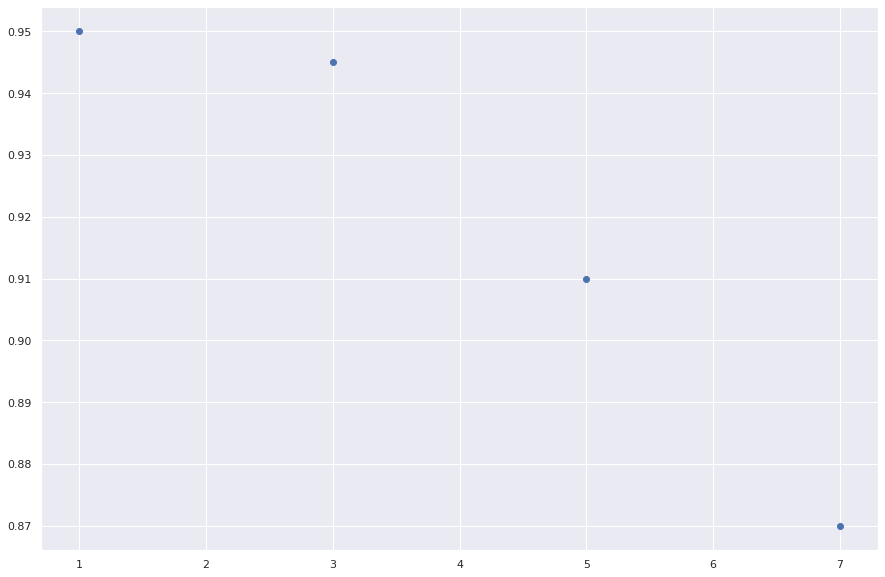

              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       1.00      0.60      0.75         5
          17       1.00      1.00      1.00         5
          18       1.00    

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Knn=[1,3,5,7]

def score_calc_LDA(Knn,projected_matrix_training, projected_matrix_testing, split_labels_vectors):
    print("score-D------------------------------")
    scores = [0,0,0,0]
    y_pred = []
    for i in range(len(Knn)):
        neigh = KNeighborsClassifier(n_neighbors=Knn[i], weights='distance')
        neigh.fit(projected_matrix_training, split_labels_vectors)
        scores[i] = neigh.score(projected_matrix_testing, split_labels_vectors)
        y_pred.append(neigh.predict(projected_matrix_testing))
    plt.scatter(Knn, scores)
    plt.show()
    print(classification_report(split_labels_vectors, y_pred[0]))
    print(scores)

score_calc_LDA(Knn,D_reduced_train,D_reduced_test,trainData['label'])   


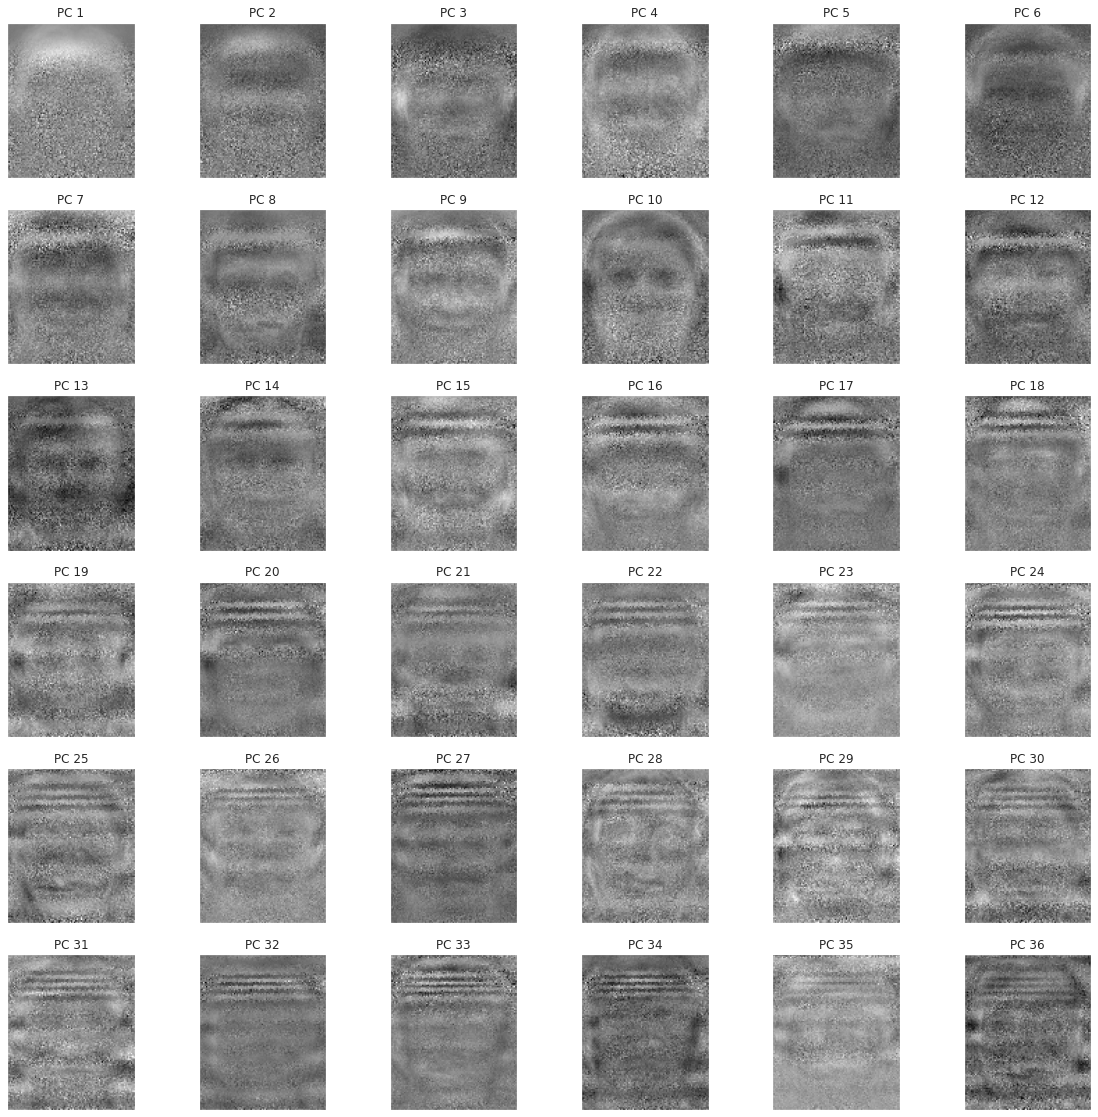

In [37]:
from numpy.lib.function_base import append

def show_eigenfaces(data):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(6,6, figsize=(20, 20),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(data[i].reshape(112, 92), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()
 
show_eigenfaces(np.transpose(U))

In [38]:
def LDAalgorithm(trainData,testData,classesNumber) :

  meanMatrix = mean_matrix(trainData,classesNumber);
   
  totalMean = np.mean(trainData, axis=0)
  totalMean = totalMean[:-1]
  
  Sb = between_class_scatter_matrix(trainData,meanMatrix[:,:-1] ,totalMean,classesNumber)

  Z = center_class_matrices(trainData,meanMatrix,classesNumber)

  S = class_scatter_matrix_one(trainData,Z,classesNumber)

  W = np.dot(np.linalg.inv(S),Sb)
  eigen_values , eigen_vectors = np.linalg.eigh(W)

  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  U = sorted_eigenvectors[:,0:classesNumber-1]

  
  trainFaces = trainData.drop(["label"],axis=1)
  testFaces = testData.drop(["label"],axis=1)
  Data_reduced_train , Data_reduced_test = get_reduced_data(trainFaces,testFaces,U)

  return Data_reduced_train , Data_reduced_test

#7. Compare vs Non-Face Images 


In [33]:
# !wget https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/faces.zip?raw=true
# !wget https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/nonfaces.zip?raw=true

# !unzip /content/faces.zip?raw=true
# !unzip /content/nonfaces.zip?raw=true

!wget https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/nonfaces_800.zip?raw=true
!unzip /content/nonfaces_800.zip?raw=true

--2022-03-23 00:18:08--  https://github.com/RanaAyman/AT-T-Database-of-Faces/blob/main/nonfaces_800.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/RanaAyman/AT-T-Database-of-Faces/raw/main/nonfaces_800.zip [following]
--2022-03-23 00:18:08--  https://github.com/RanaAyman/AT-T-Database-of-Faces/raw/main/nonfaces_800.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RanaAyman/AT-T-Database-of-Faces/main/nonfaces_800.zip [following]
--2022-03-23 00:18:09--  https://raw.githubusercontent.com/RanaAyman/AT-T-Database-of-Faces/main/nonfaces_800.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

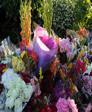

In [34]:
from google.colab.patches import cv2_imshow
import cv2
img2 = cv2.imread('/content/nonfaces_800/5.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img2)

In [35]:
import numpy as np
import os
import cv2

nonfaces=[]
nonfacesLabel=[]
nonfacesLabelLDA=[]
nonfacesimages = os.listdir('/content/nonfaces_800')
i=1
for image in nonfacesimages:
  img = cv2.imread('/content/nonfaces_800'+"/"+image,0)
  img_col = np.array(img, dtype='float64').flatten()
  sub = 0
  i+=1
  nonfaces.append(img_col)
  nonfacesLabel.append(sub)
  nonfacesLabelLDA.append(2)

In [36]:
print(nonfaces)
print(nonfacesLabel)
print(len(nonfaces))

[array([171., 165., 181., ..., 138., 132., 118.]), array([174., 174., 174., ..., 184., 185., 186.]), array([ 36.,  42.,  48., ..., 104., 104., 107.]), array([123., 136., 159., ..., 200., 194., 186.]), array([165., 169., 173., ..., 149., 182., 158.]), array([242., 234., 216., ..., 186., 182., 181.]), array([173., 139., 123., ..., 177., 183., 182.]), array([ 91.,  95., 100., ..., 111., 106., 103.]), array([13., 26.,  3., ..., 15., 30., 13.]), array([115., 105.,  98., ..., 154., 158., 154.]), array([13., 17., 19., ..., 27., 30., 35.]), array([160., 149., 126., ..., 160., 159., 153.]), array([234., 234., 234., ...,  23.,  27.,  20.]), array([101.,  85.,  49., ..., 146., 162., 177.]), array([56., 48., 68., ...,  3.,  3.,  3.]), array([21., 21., 21., ..., 59., 87., 97.]), array([240., 240., 240., ..., 250., 250., 250.]), array([ 89., 101., 102., ...,  45.,  78.,  86.]), array([33., 33., 34., ..., 32., 32., 32.]), array([136., 135., 135., ...,  18.,  18.,  18.]), array([18., 18., 18., ..., 19

In [37]:
import pandas as pd
faceLabel2 = np.repeat(np.arange(1, 2), 400)
newFaces = df.drop(['label'],axis = 1)
newFaces['label'] = faceLabel2
newFaces.head()

0     1     2     3     4     5     6     7     8     9  ...  10295  \
0  64.0  76.0  80.0  53.0  34.0  72.0  60.0  66.0  66.0  50.0  ...   28.0   
1  60.0  60.0  62.0  53.0  48.0  51.0  61.0  60.0  71.0  68.0  ...   35.0   
2  63.0  53.0  35.0  36.0  33.0  34.0  31.0  35.0  39.0  43.0  ...  169.0   
3  48.0  49.0  45.0  47.0  49.0  57.0  39.0  42.0  53.0  49.0  ...   44.0   
4  41.0  47.0  47.0  46.0  44.0  49.0  48.0  58.0  61.0  49.0  ...   34.0   

   10296  10297  10298  10299  10300  10301  10302  10303  label  
0   34.0   32.0   35.0   34.0   35.0   35.0   37.0   39.0      1  
1   28.0   33.0   31.0   31.0   37.0   32.0   34.0   34.0      1  
2  166.0  161.0  158.0  169.0  137.0   41.0   10.0   24.0      1  
3   40.0   41.0   49.0   42.0   44.0   47.0   46.0   46.0      1  
4   35.0   34.0   36.0   34.0   39.0   35.0   37.0   38.0      1  

[5 rows x 10305 columns]

In [38]:
def datasetFormulator(limit):
  newNonFaces = pd.DataFrame(data=nonfaces[:limit])
  newNonFaces['label'] = nonfacesLabel[:limit]
  newDataSet = pd.concat([newFaces,newNonFaces])
  newDataSet.reset_index(drop=True)
  newTestData = newDataSet[newDataSet.index % 2 == 0]  #even rows
  newTrainData = newDataSet[newDataSet.index % 2 != 0]   #odd rows
  return newDataSet, newTrainData, newTestData,newTrainData['label'], newTestData['label']

In [39]:
newDataSet, newTrainData, newTestData,newTrainDataLabels, newTestDataLabels = datasetFormulator(400)

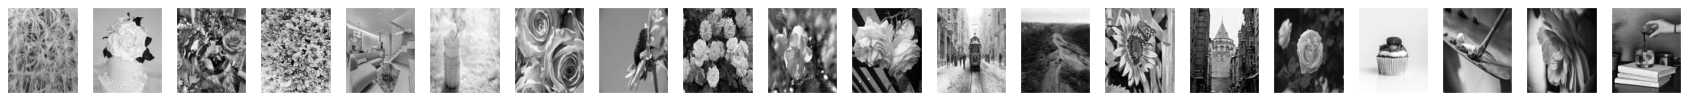

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 20, figsize=(30, 30),
                          subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(nonfaces)[i].reshape(112, 92), cmap='gray')
plt.show()

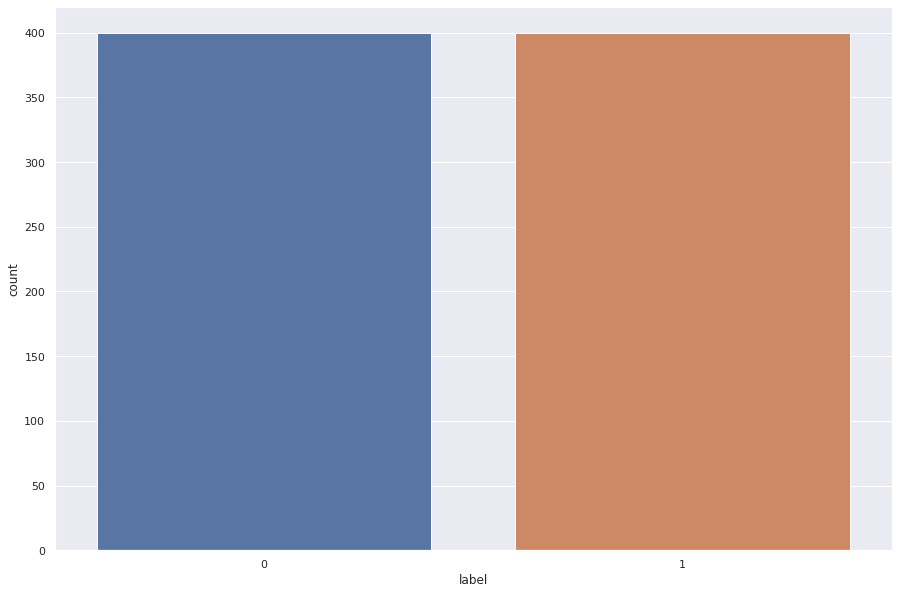

In [41]:
import seaborn as sns
sns.countplot(x='label', data=newDataSet)
sns.set(rc={'figure.figsize':(8,4)})

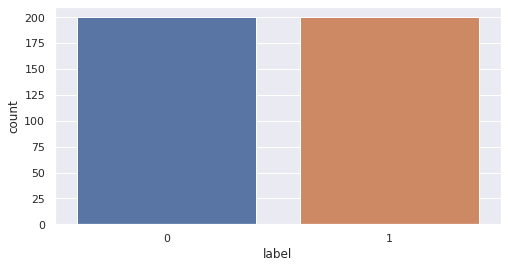

In [42]:
sns.countplot(x='label', data=newTestData)
sns.set(rc={'figure.figsize':(8,4)})

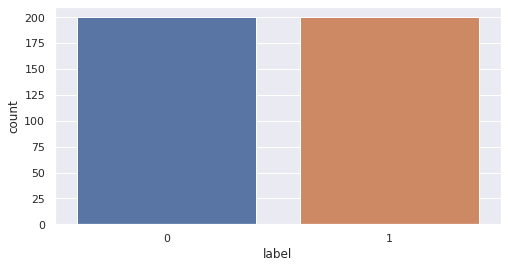

In [43]:
sns.countplot(x='label', data=newTrainData)
sns.set(rc={'figure.figsize':(8,4)})

In [44]:
import matplotlib.pyplot as plt
def show_orignal_images2(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(4, 5, figsize=(10, 10),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(112, 92), cmap='gray')
	plt.show()

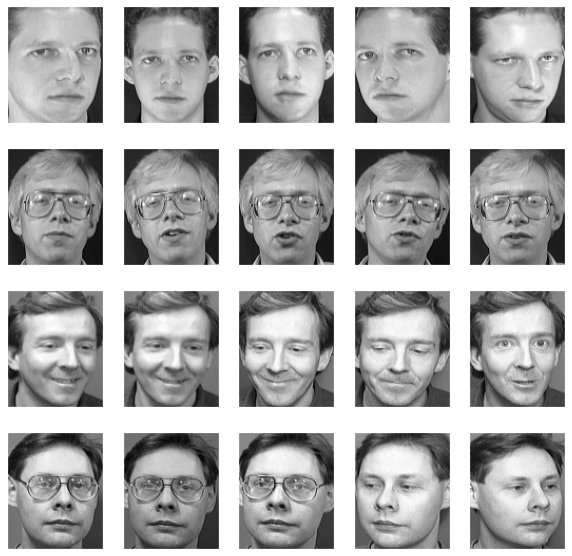

In [45]:
newPixels =  newTrainData.drop(["label"],axis=1)
show_orignal_images2(newPixels)

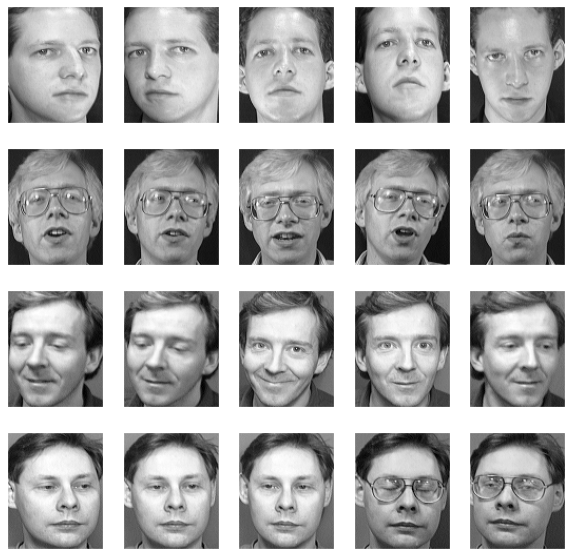

In [46]:
newPixels =  newTestData.drop(["label"],axis=1)
show_orignal_images2(newPixels)

num_components =  34
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       200
           1       0.98      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

num_components =  35
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.98      0.98      0.98       200

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

num_components =  37
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       300
           1       0.98      0.96      0.97       200

    accuracy                           0.98       500
   macro avg       0.98      0.97      0.97       500
weighted av

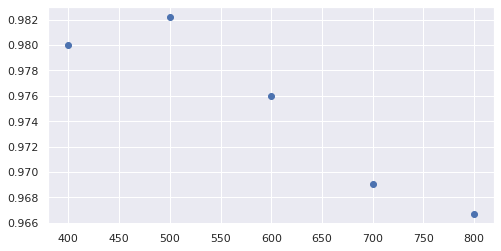

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

accuracies = [0,0,0,0,0]
formulator = [400,500,600,700,800]

for i in range(0,5): 
  newDt, newTr, newTd,newTrL, newTdL = datasetFormulator(formulator[i])
  newTr = newTr.drop(["label"],axis=1)
  newTd = newTd.drop(["label"],axis=1)
  newReducedTraindata,newEVectors=pca(newTr,0.8)
  D_meaned_test = newTd - np.mean(testFaces , axis = 0)
  test_data = np.dot(D_meaned_test, newEVectors)
  neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
  neigh.fit(newReducedTraindata, newTrL)
  score = neigh.score(test_data, newTdL)
  y_pred=neigh.predict(test_data)
  print(classification_report(newTdL, y_pred))
  accuracies[i] = score

plt.scatter(formulator, accuracies)
plt.show()

**Using LDA**

In [23]:
def datasetFormulatorLDA(limit):
  newNonFaces = pd.DataFrame(data=nonfaces[:limit])
  newNonFaces['label'] = nonfacesLabelLDA[:limit]
  newDataSet = pd.concat([newFaces.head(100),newNonFaces])
  newDataSet.reset_index(drop=True, inplace=True)
  newTestData = newDataSet[newDataSet.index % 2 == 0]  #even rows
  newTrainData = newDataSet[newDataSet.index % 2 != 0]   #odd rows
  return newDataSet, newTrainData, newTestData,newTrainData['label'], newTestData['label']

In [58]:
newDataSet, newTrainData, newTestData,newTrainDataLabels, newTestDataLabels = datasetFormulatorLDA(100)

In [59]:
print(newTrainData)
print(newTestData.shape)
print(newTrainDataLabels.shape)
print(newTestDataLabels.shape)

         0      1      2      3      4      5      6      7      8      9  \
1     60.0   60.0   62.0   53.0   48.0   51.0   61.0   60.0   71.0   68.0   
3     48.0   49.0   45.0   47.0   49.0   57.0   39.0   42.0   53.0   49.0   
5     44.0   43.0   32.0   32.0   30.0   30.0   38.0   40.0   48.0   66.0   
7     43.0   50.0   41.0   58.0   78.0   83.0   67.0   48.0   44.0   46.0   
9     34.0   34.0   33.0   32.0   38.0   40.0   39.0   49.0   54.0   57.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
191   11.0   12.0   12.0   13.0   13.0   12.0   12.0   11.0   12.0   13.0   
193   62.0   52.0   48.0   49.0   57.0   69.0   71.0   66.0   71.0   69.0   
195  196.0  198.0  199.0  198.0  197.0  197.0  196.0  195.0  177.0  197.0   
197   28.0   35.0   33.0   32.0   36.0   31.0   28.0   37.0   28.0   31.0   
199  240.0  240.0  240.0  240.0  240.0  240.0  240.0  240.0  240.0  240.0   

     ...  10295  10296  10297  10298  10299  10300  10301  10302  10303  la

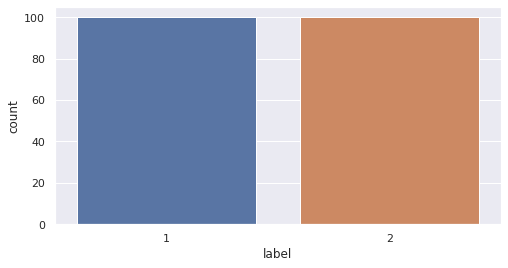

In [60]:
import seaborn as sns
sns.countplot(x='label', data=newDataSet)
sns.set(rc={'figure.figsize':(8,4)})

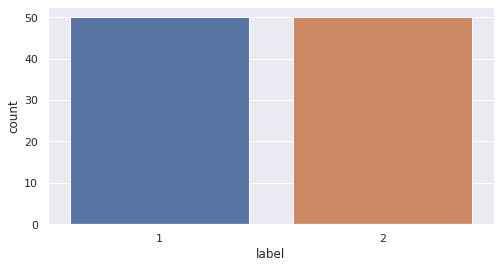

In [61]:
sns.countplot(x='label', data=newTestData)
sns.set(rc={'figure.figsize':(8,4)})

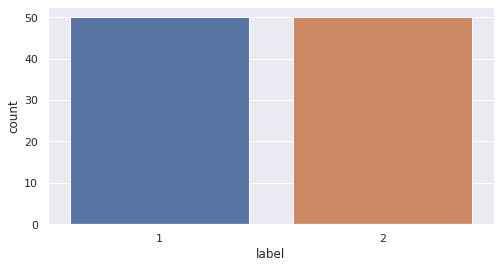

In [62]:
sns.countplot(x='label', data=newTrainData)
sns.set(rc={'figure.figsize':(8,4)})

In [63]:
def get_reduced_data(trainData,testData,U):

  D_reduced_train = np.dot(trainData,U)
  D_reduced_test = np.dot(testData,U)
     
  return D_reduced_train,D_reduced_test

In [64]:
def LDAalgorithm(trainData,testData,classesNumber) :

  meanMatrix = mean_matrix(trainData,classesNumber);
   
  totalMean = np.mean(trainData, axis=0)
  totalMean = totalMean[:-1]
  
  Sb = between_class_scatter_matrix(trainData,meanMatrix[:,:-1] ,totalMean,classesNumber)

  Z = center_class_matrices(trainData,meanMatrix,classesNumber)

  S = class_scatter_matrix_one(trainData,Z,classesNumber)

  W = np.dot(np.linalg.inv(S),Sb)
  eigen_values , eigen_vectors = np.linalg.eigh(W)

  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  U = sorted_eigenvectors[:,0:classesNumber-1]

  
  trainFaces = trainData.drop(["label"],axis=1)
  testFaces = testData.drop(["label"],axis=1)
  Data_reduced_train , Data_reduced_test = get_reduced_data(trainFaces,testFaces,U)

  return Data_reduced_train , Data_reduced_test

In [65]:
Data_reduced_train , Data_reduced_test = LDAalgorithm(newTrainData,newTestData,2)

print(Data_reduced_train)
print(Data_reduced_train.shape)
print(Data_reduced_test)
print(Data_reduced_test.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


[[1865.93566176]
 [2090.99827348]
 [2608.67394926]
 [2005.55463573]
 [2307.5081907 ]
 [2222.39566061]
 [2215.25772432]
 [2283.34944677]
 [2086.45089813]
 [2189.44020654]
 [ 773.03827361]
 [ 911.47501967]
 [ 984.59539643]
 [ 853.03825237]
 [1106.42825072]
 [ 909.28923838]
 [ 569.05070201]
 [ 972.23444068]
 [1630.22500268]
 [ 939.5104898 ]
 [ 731.2149271 ]
 [ 591.98643919]
 [ 754.77020542]
 [ 825.09382918]
 [ 835.49427894]
 [-444.36344311]
 [-348.46648432]
 [-335.88836555]
 [-321.43231014]
 [-340.30888634]
 [ 942.55474218]
 [ 889.03151458]
 [ 863.99925179]
 [ 947.10522041]
 [ 935.09486557]
 [ 690.94968163]
 [ 640.66307443]
 [1141.43487385]
 [1301.53432587]
 [1123.0851059 ]
 [ 470.68949028]
 [ 399.82986037]
 [ 263.75778426]
 [ 398.66989542]
 [ 538.71086726]
 [-245.03373508]
 [-673.69724928]
 [-105.96515516]
 [-480.88464568]
 [ 498.41690199]
 [ 678.71718071]
 [ 374.74243946]
 [ 849.34856419]
 [ 620.49230453]
 [ 407.34182929]
 [1318.25195934]
 [ 601.348109  ]
 [ 548.88668393]
 [ 483.5532827

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


              precision    recall  f1-score   support

           1       0.64      0.64      0.64        50
           2       0.64      0.64      0.64        50

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


              precision    recall  f1-score   support

           1       0.44      0.56      0.49        50
           2       0.74      0.64      0.69       100

    accuracy                           0.61       150
   macro avg       0.59      0.60      0.59       150
weighted avg       0.64      0.61      0.62       150



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


              precision    recall  f1-score   support

           1       0.48      0.56      0.52        50
           2       0.85      0.80      0.82       150

    accuracy                           0.74       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.75      0.74      0.75       200



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


              precision    recall  f1-score   support

           1       0.52      0.46      0.49        50
           2       0.87      0.90      0.88       200

    accuracy                           0.81       250
   macro avg       0.70      0.68      0.69       250
weighted avg       0.80      0.81      0.80       250



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


              precision    recall  f1-score   support

           1       0.49      0.44      0.46        50
           2       0.89      0.91      0.90       250

    accuracy                           0.83       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.82      0.83      0.83       300



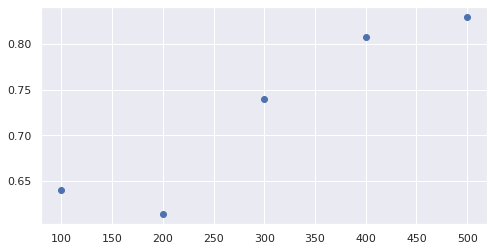

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

accuracies = [0,0,0,0,0]
formulator = [100,200,300,400,500]

for i in range(0,5): 
  newDt, newTr, newTd,newTrL, newTdL = datasetFormulatorLDA(formulator[i])
 
  Data_reduced_train , Data_reduced_test = LDAalgorithm(newTr,newTd,2)

  neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')
  neigh.fit(Data_reduced_train, newTrL)
  score = neigh.score(Data_reduced_test, newTdL)
  y_pred=neigh.predict(Data_reduced_test)
  print(classification_report(newTdL, y_pred))
  accuracies[i] = score

plt.scatter(formulator, accuracies)
plt.show()

#8. Change the number of instances per subject to be 7 and keep 3 instances per subject for testing. 

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(['label'],axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size=0.3, random_state=100,stratify=y)

print(x_train)
print(y_train)

     0      1      2      3      4      5      6      7      8      9      \
273  122.0  122.0  121.0  123.0  122.0  117.0  115.0  117.0  116.0  110.0   
145   45.0   38.0   40.0   41.0   42.0   40.0   41.0   40.0   41.0   42.0   
84   112.0  109.0  116.0  112.0  113.0  113.0  115.0  114.0  114.0  116.0   
160   52.0   56.0   60.0   58.0   54.0   57.0   59.0   56.0   59.0   58.0   
332   25.0   25.0   23.0   24.0   27.0   25.0   27.0   26.0   22.0   25.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
366  121.0  121.0  122.0  122.0  124.0  121.0  124.0  124.0  120.0  123.0   
353   63.0   67.0   65.0   64.0   64.0   64.0   66.0   66.0   56.0   63.0   
263   41.0   49.0   45.0   42.0   46.0   44.0   44.0   46.0   43.0   46.0   
290  112.0  109.0  112.0  109.0  113.0  113.0  102.0  109.0  109.0   96.0   
208   95.0   95.0   99.0   94.0   95.0   98.0   97.0   99.0   92.0   94.0   

     ...  10294  10295  10296  10297  10298  10299  10300  10301  10302  10

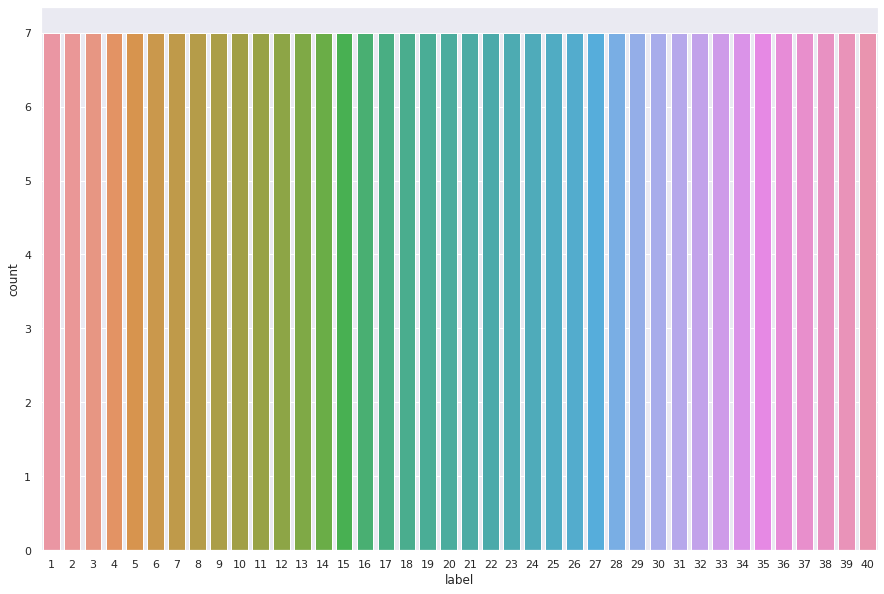

In [23]:
import seaborn as sns
dfTrain = pd.DataFrame(data=x_train)
dfTrain['label']=y_train
# dfTrain.head()
sns.countplot(x='label', data=dfTrain)
sns.set(rc={'figure.figsize':(15,10)})

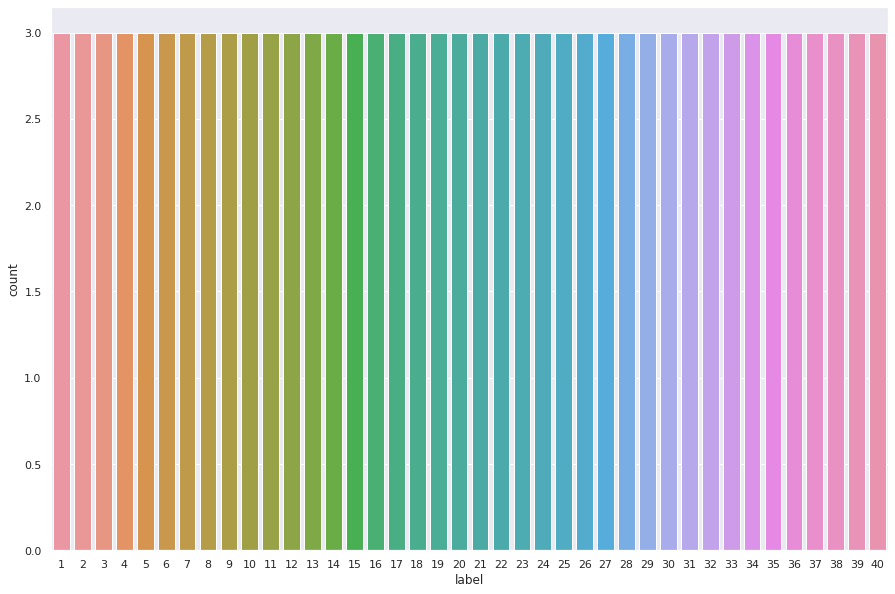

In [24]:
import seaborn as sns
dfTest = pd.DataFrame(data=x_test)
dfTest['label']=y_test
# dfTrain.head()
sns.countplot(x='label', data=dfTest)
sns.set(rc={'figure.figsize':(15,10)})

num_components =  40
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

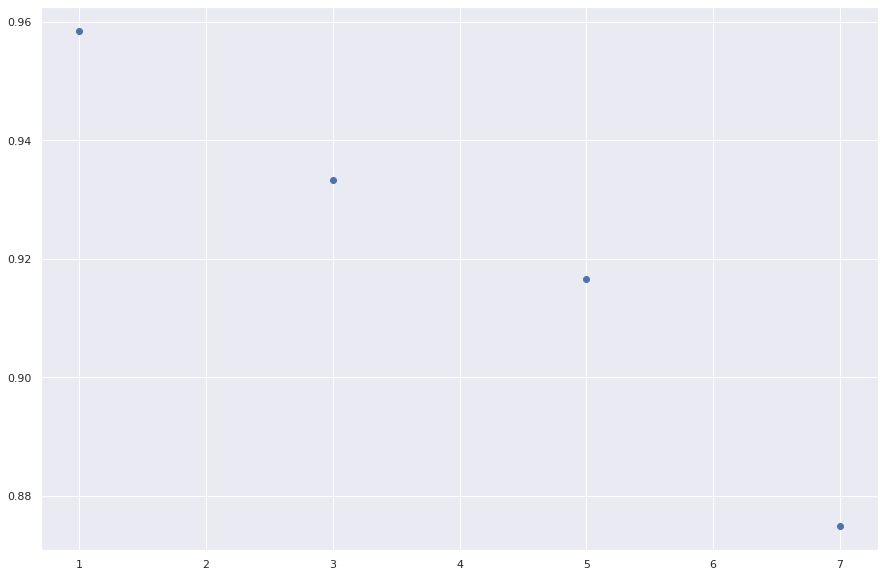

num_components =  59
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

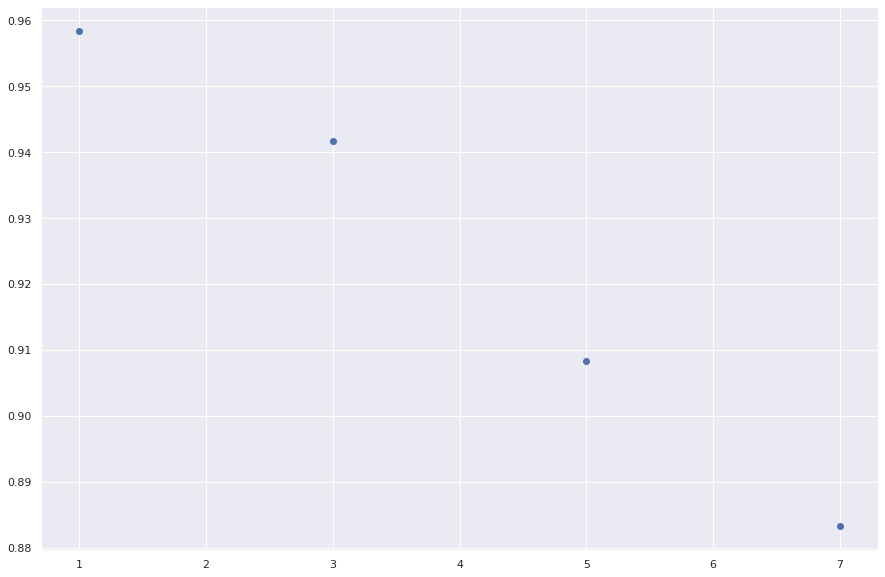

num_components =  91
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       0.75      1.00      0.86         3
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


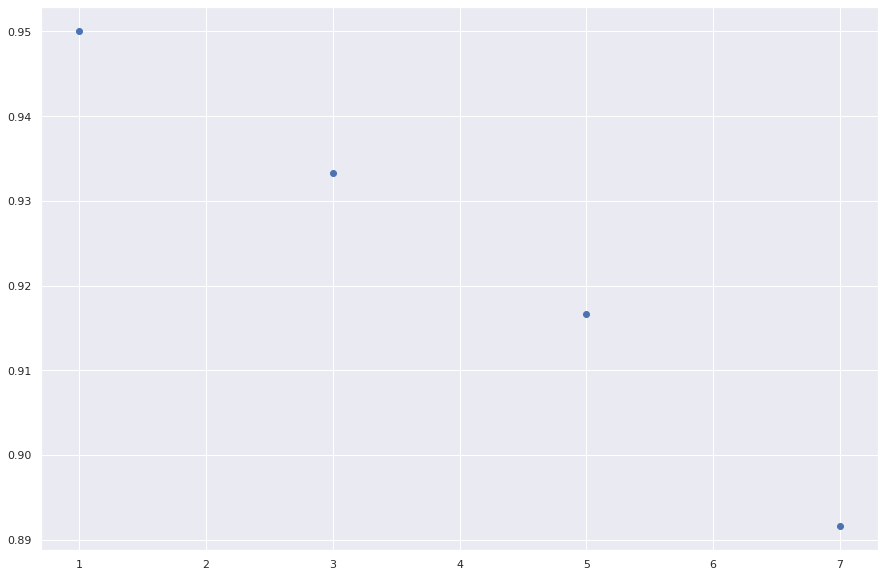

num_components =  147
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       0.75      1.00      0.86         3
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


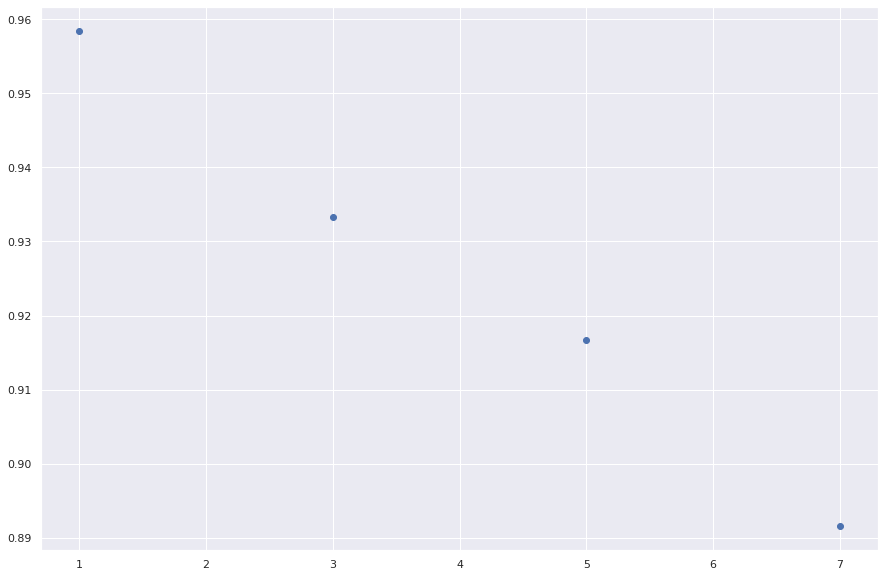

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

alphas=[0.8,0.85,0.9,0.95]

for alpha in alphas:
  Knn=[1,3,5,7]
  accuracies = [0,0,0,0]
  counter = 0
  newReducedTraindata,newEVectors=pca(x_train,alpha)
  D_meaned_test = x_test - np.mean(x_test , axis = 0)
  newReducedTestdata = np.dot(D_meaned_test, newEVectors)
  for k in Knn: 
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(newReducedTraindata, y_train)
    score = neigh.score(newReducedTestdata, y_test)
    y_pred=neigh.predict(newReducedTestdata)
    print(classification_report(y_test, y_pred))
    accuracies[counter] = score
    counter = counter+1
  
  print(f"Alpha : {alpha}")
  plt.scatter(Knn, accuracies)
  plt.show()

**Using LDA**



In [39]:
Data_reduced_train , Data_reduced_test = LDAalgorithm(dfTrain,dfTest,40)

print(Data_reduced_train)
print(Data_reduced_train.shape)
print(Data_reduced_test)
print(Data_reduced_test.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  if __name__ == '__main__':


[[-6617.09396288  3776.65857461  1473.6857927  ...    43.57295032
    426.17617954  -244.97570157]
 [-4477.06251166  4495.40523919  1841.76023299 ...    46.42676243
    418.31098843  -305.56376398]
 [-5179.88542473  4433.20614039   -82.32089556 ...    87.05803609
     80.00154491  -257.45001718]
 ...
 [-5921.33332074  4258.26280148  2779.04031753 ...   102.72306997
    317.06116333  -519.94719353]
 [-3581.94871098  3262.45260157    27.66904161 ...   233.25677458
    337.40346757  -397.12464707]
 [-4077.01549388  3527.18661945  -131.19835983 ...   138.84132509
    385.20089883  -310.25577351]]
(280, 39)
[[-4267.54016628  4747.67589855  1326.82261668 ...    26.3607674
    232.55497441  -167.84156808]
 [-4383.92185105  4717.59438358  -252.11503022 ...    23.80820484
    346.81219196  -297.99798935]
 [-6044.91774915  3916.15619638   951.11576677 ...   167.31712422
     53.72279107  -413.71160044]
 ...
 [-6891.34487504  4685.78368617  2839.35881107 ...    89.39188976
    358.37706956  -442.

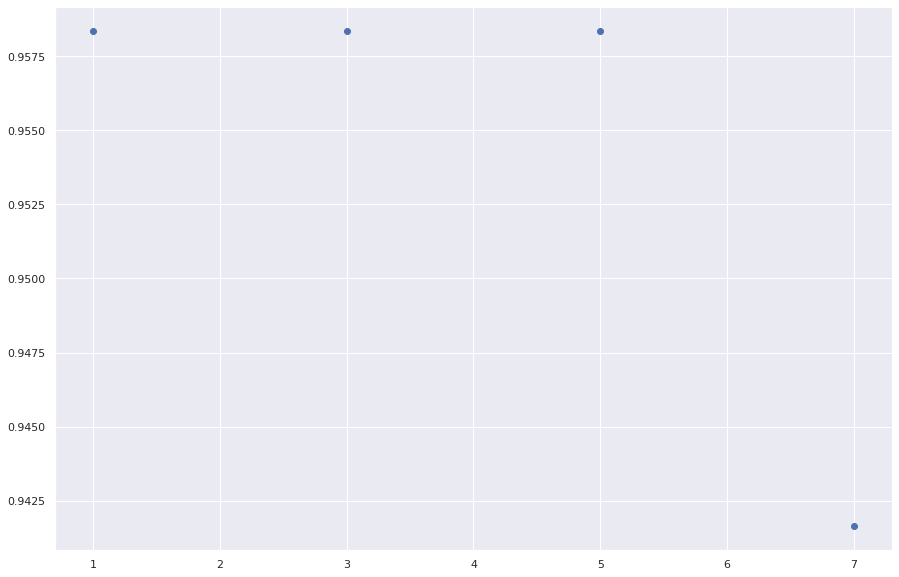

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         3
          18       1.00    

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Knn=[1,3,5,7]
scores = [0,0,0,0]
y_pred = []

for i in range(len(Knn)):
  neigh = KNeighborsClassifier(n_neighbors=Knn[i], weights='distance')
  neigh.fit(Data_reduced_train,y_train)
  scores[i] = neigh.score(Data_reduced_test, y_test)
  y_pred.append(neigh.predict(Data_reduced_test))
plt.scatter(Knn, scores)
plt.show()

print(classification_report(y_test, y_pred[0]))
print(scores)




##Reference
https://www.youtube.com/watch?v=g4Urfno4aTc

https://www.askpython.com/python/examples/principal-component-analysis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html